IMPORT LIBRARY

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LOAD DATA

In [9]:
#WRANGLING DATA SEKOLAH

df_sekolah = pd.read_excel("jumlah-sekolah-dan-siswa-inklusi-per-kecamatan-2025.xlsx")

# Normalisasi nama kecamatan
df_sekolah["Kecamatan"] = df_sekolah["Kecamatan"].astype(str).str.lower().str.strip()
df_sekolah_pilihan = df_sekolah[["Kecamatan", "SD Inklusi", "SMP Inklusi"]]

# Memastikan kolom angka benar
kolom_sekolah = ["SD Inklusi", "SMP Inklusi"]
for kol in kolom_sekolah:
    df_sekolah[kol] = pd.to_numeric(df_sekolah[kol], errors="coerce").fillna(0)

df_sekolah_pilihan

,Kecamatan,SD Inklusi,SMP Inklusi
0,karang pilang,2,1
1,jambangan,2,2
2,gayungan,6,1
3,wonocolo,6,2
4,tenggilis mejoyo,4,1
...,...,...,...
305,bubutan,3,1
306,krembangan,7,3
307,asem rowo,2,1
308,benowo,5,2


In [10]:
#WRANGLING DATA KEPADATAN

df_kepadatan = pd.read_excel("Kepadatan Penduduk Menurut Kecamatan Hasil Registrasi di Kota Surabaya, 2024.xlsx")

# Bersihkan kecamatan kosong
df_kepadatan = df_kepadatan.dropna(subset=["kecamatan."])

# Rename kolom
df_kepadatan.columns = ["Kecamatan", "Kepadatan"]

# Normalisasi nama kecamatan
df_kepadatan["Kecamatan"] = df_kepadatan["Kecamatan"].astype(str).str.lower().str.strip()

# Bersihkan angka kepadatan
df_kepadatan["Kepadatan"] = (
    df_kepadatan["Kepadatan"]
    .astype(str)
    .str.replace(",", "")
)

df_kepadatan["Kepadatan"] = pd.to_numeric(df_kepadatan["Kepadatan"], errors="coerce")

# Isi NA dengan median
df_kepadatan["Kepadatan"] = df_kepadatan["Kepadatan"].fillna(df_kepadatan["Kepadatan"].median())

df_kepadatan

,Kecamatan,Kepadatan
2,karangpilang,8041
3,jambangan,13222
4,gayungan,7444
5,wonocolo,12256
6,tenggilis mejoyo,10143
7,gunung anyar,6142
8,rungkut,5397
9,sukolilo,3845
10,mulyorejo,5079
11,gubeng,16757


In [11]:
#WRANGLING DATA PROPERTI

df_properti = pd.read_excel("Combined_Datalist_v1.1.xlsx")

# Normalisasi nama kecamatan
df_properti["Kecamatan"] = df_properti["Kecamatan"].astype(str).str.lower().str.strip()
df_properti_pilihan = df_properti[["Kecamatan", "Price", "Luas Bangunan", "Luas Tanah"]]

# Kolom numerik properti
kolom_numerik = ["Price", "Luas Bangunan", "Luas Tanah"]

for kol in kolom_numerik:
    df_properti[kol] = pd.to_numeric(df_properti[kol], errors="coerce")

df_properti[kolom_numerik] = df_properti[kolom_numerik].fillna(0)

df_properti_pilihan

,Kecamatan,Price,Luas Bangunan,Luas Tanah
0,wonokromo,600000000,70,45
1,rungkut,600000000,2023,48
2,semampir,600000000,85,48
3,pakal,600000000,91,50
4,gayungan,600000000,50,51
...,...,...,...,...
8975,tenggilis mejoyo,9000000000,400,540
8976,tambaksari,9000000000,245,630
8977,wonocolo,9000000000,500,780
8978,sukomanunggal,9000000000,250,800


MERGE DATA

In [12]:
# Gabungkan sekolah + kepadatan
df_sekolah_kepadatan = pd.merge(
    df_sekolah_pilihan,
    df_kepadatan,
    on="Kecamatan",
    how="left"
)

# Gabungkan properti + (sekolah + kepadatan)
df_final = pd.merge(
    df_properti_pilihan,
    df_sekolah_kepadatan,
    on="Kecamatan",
    how="left"
)

# Isi NA numerik dengan median kepadatan
df_final["Kepadatan"] = df_final["Kepadatan"].fillna(df_final["Kepadatan"].median())

df_final

,Kecamatan,Price,Luas Bangunan,Luas Tanah,SD Inklusi,SMP Inklusi,Kepadatan
0,wonokromo,600000000,70,45,3.0,3.0,18591.0
1,wonokromo,600000000,70,45,4.0,3.0,18591.0
2,wonokromo,600000000,70,45,4.0,3.0,18591.0
3,wonokromo,600000000,70,45,4.0,3.0,18591.0
4,wonokromo,600000000,70,45,4.0,3.0,18591.0
...,...,...,...,...,...,...,...
89696,dukuh pakis,9000000000,400,899,2.0,1.0,5784.0
89697,dukuh pakis,9000000000,400,899,2.0,1.0,5784.0
89698,dukuh pakis,9000000000,400,899,2.0,1.0,5784.0
89699,dukuh pakis,9000000000,400,899,2.0,1.0,5784.0


EDA DASAR

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89701 entries, 0 to 89700
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kecamatan      89701 non-null  object 
 1   Price          89701 non-null  int64  
 2   Luas Bangunan  89701 non-null  int64  
 3   Luas Tanah     89701 non-null  int64  
 4   SD Inklusi     89690 non-null  float64
 5   SMP Inklusi    89690 non-null  float64
 6   Kepadatan      89701 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.8+ MB
None
              Price  Luas Bangunan    Luas Tanah    SD Inklusi   SMP Inklusi  \
count  8.970100e+04   89701.000000  89701.000000  89690.000000  89690.000000   
mean   3.400163e+09     205.736502    187.169251      5.086476      2.003077   
std    4.037188e+09     157.493231    140.601881      2.235181      1.019588   
min    6.000000e+08      50.000000     45.000000      0.000000      0.000000   
25%    1.500000e+09     110.0

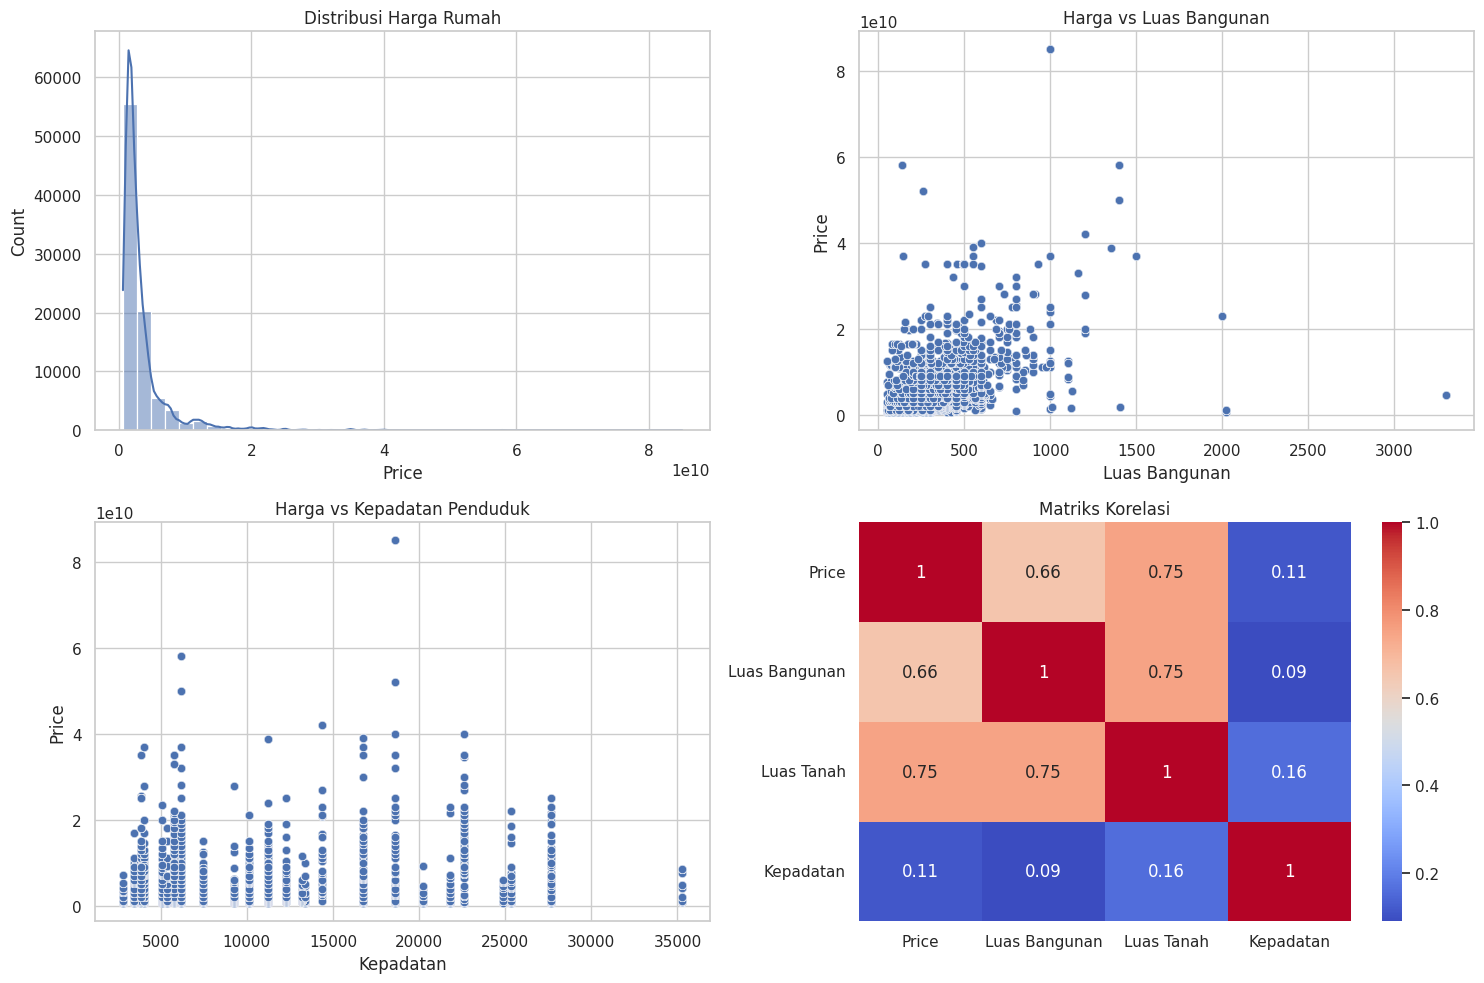


 ANALISIS KORELASI DETAIL
                  Price  Luas Bangunan  Luas Tanah  Kepadatan
Price          1.000000       0.658085    0.748931   0.112406
Luas Bangunan  0.658085       1.000000    0.748668   0.090459
Luas Tanah     0.748931       0.748668    1.000000   0.157971
Kepadatan      0.112406       0.090459    0.157971   1.000000
File 'data_rumah_wrangled.csv' berhasil dibuat.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Info & statistik dasar
print(df_final.info())
print(df_final.describe())

# Tema visual rapi
sns.set_theme(style="whitegrid")

# layout 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribusi Harga Rumah
sns.histplot(df_final["Price"], bins=40, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribusi Harga Rumah")

# 2. Harga vs Luas Bangunan
sns.scatterplot(
    x="Luas Bangunan",
    y="Price",
    data=df_final,
    ax=axes[0, 1],
    alpha=0.6
)
axes[0, 1].set_title("Harga vs Luas Bangunan")

# 3. Harga vs Kepadatan Penduduk
sns.scatterplot(
    x="Kepadatan",
    y="Price",
    data=df_final,
    ax=axes[1, 0],
    alpha=0.6
)
axes[1, 0].set_title("Harga vs Kepadatan Penduduk")

# 4. Heatmap Korelasi
corr = df_final[["Price","Luas Bangunan","Luas Tanah","Kepadatan"]].corr()
sns.heatmap(
    corr, annot=True, cmap="coolwarm", ax=axes[1, 1]
)
axes[1, 1].set_title("Matriks Korelasi")

# Rapikan layout
plt.tight_layout()
plt.show()

# Tampilkan korelasi detail
print("\n ANALISIS KORELASI DETAIL")
print(corr)

# Simpan file CSV
df_final.to_csv("data_rumah_wrangled.csv", index=False)
print("File 'data_rumah_wrangled.csv' berhasil dibuat.")


Data Publishing